### TODO
- Load the S&P dataframe and choose a stock
- Load a model and plot the forecast

In [138]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:
import pandas as pd
import numpy as np

from pipeline.preprocessing import preprocess
from pipeline.walkforward import WFCVGenerator
from config.config_types import AppConfig
import torch

from utils.paths import CONFIG_DIR, SP500COPY_PATH, SP500_PATH, DATA_DIR, VOL_EXPERIMENTS_DIR

In [140]:
df_sp = pd.read_parquet(SP500_PATH)
df_sp

,permno,date,ret,close,vol,open,high,low,cfacpr
0,10078,2000-01-03,-0.012107,76.5,15270527.0,79.25,79.375,74.5,0.5
1,10078,2000-01-04,-0.062092,71.75,21098710.0,73.4375,75.25,71.5,0.5
2,10078,2000-01-05,0.001742,71.875,30073258.0,70.125,73.5,66.625,0.5
3,10078,2000-01-06,-0.053913,68.0,22741999.0,70.4375,71.875,67.0,0.5
4,10078,2000-01-07,0.056985,71.875,20450260.0,67.1875,72.0,66.75,0.5
...,...,...,...,...,...,...,...,...,...
155298,93436,2024-12-24,0.073572,462.28,59351506.0,435.89999,462.78,435.14001,1.0
155299,93436,2024-12-26,-0.01763,454.13,76392273.0,465.16,465.3299,451.01999,1.0
155300,93436,2024-12-27,-0.049479,431.66,82370345.0,449.51999,450.0,426.5,1.0
155301,93436,2024-12-30,-0.033012,417.41,64705452.0,419.39999,427.0,415.75,1.0


/orcd/home/002/corte911/code/finNN_code/src/pipeline/preprocessing.py:175: RuntimeWarning: invalid value encountered in log
  log_co = np.log(close / open_)


64565


<Axes: >

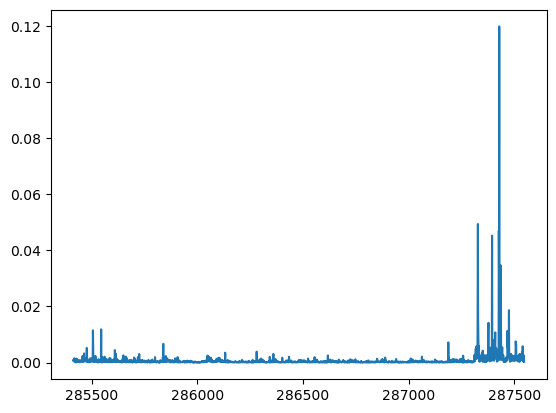

In [185]:
df = preprocess()

permno = np.random.choice(df["permno"].unique())
print(permno)
#permno = 82307
df_permno = df[df["permno"]==permno]
df_permno["var"].plot(kind="line")

In [186]:
df_permno

,permno,date,ret,close,vol,open,high,low,cfacpr,var,t
285413,64565,2000-01-03,-0.027228,6.140627,792500.0,6.312502,6.343752,6.062502,3.999999,0.000734,0
285414,64565,2000-01-04,0.005089,6.171877,943100.0,6.125002,6.312502,6.109377,3.999999,0.000512,1
285415,64565,2000-01-05,0.002532,6.187502,1131299.0,6.171877,6.437502,6.156252,3.999999,0.000995,2
285416,64565,2000-01-06,0.030303,6.375002,909800.0,6.203127,6.500002,6.187502,3.999999,0.000925,3
285417,64565,2000-01-07,0.017157,6.484377,762700.0,6.687502,6.687502,6.296877,3.999999,0.001444,4
...,...,...,...,...,...,...,...,...,...,...,...
287543,64565,2008-06-24,0.047191,4.66,33062400.0,4.41,4.66,4.41,1.0,0.000346,2130
287544,64565,2008-06-25,-0.017167,4.58,56664800.0,4.7,4.85,4.55,1.0,0.001780,2131
287545,64565,2008-06-26,-0.034935,4.42,131665100.0,4.47,4.5,4.1875,1.0,0.002541,2132
287546,64565,2008-06-27,0.0,4.42,72866700.0,4.47,4.55,4.31,1.0,0.001419,2133


In [ ]:
cfg = AppConfig.from_dict(f"{CONFIG_DIR}/vol_cnn.yaml")
wf = WFCVGenerator(cfg.walkforward, df_long=df_permno)
wf.df_master

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,y,window
0,0.000734,0.000512,0.000995,0.000925,0.001444,0.000617,0.000225,0.000176,0.001396,0.000502,...,0.000543,0.011455,0.005604,0.002202,0.000207,0.002058,0.001013,0.000609,0.000684,"(0, 100)"
1,0.000512,0.000995,0.000925,0.001444,0.000617,0.000225,0.000176,0.001396,0.000502,0.000181,...,0.011455,0.005604,0.002202,0.000207,0.002058,0.001013,0.000609,0.000684,0.000243,"(1, 101)"
2,0.000995,0.000925,0.001444,0.000617,0.000225,0.000176,0.001396,0.000502,0.000181,0.000162,...,0.005604,0.002202,0.000207,0.002058,0.001013,0.000609,0.000684,0.000243,0.000124,"(2, 102)"
3,0.000925,0.001444,0.000617,0.000225,0.000176,0.001396,0.000502,0.000181,0.000162,0.000814,...,0.002202,0.000207,0.002058,0.001013,0.000609,0.000684,0.000243,0.000124,0.000364,"(3, 103)"
4,0.001444,0.000617,0.000225,0.000176,0.001396,0.000502,0.000181,0.000162,0.000814,0.000025,...,0.000207,0.002058,0.001013,0.000609,0.000684,0.000243,0.000124,0.000364,0.001851,"(4, 104)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,0.005428,0.001062,0.001932,0.001309,0.000901,0.002543,0.001532,0.000376,0.000698,0.001060,...,0.001094,0.001357,0.003722,0.001544,0.000885,0.005782,0.001886,0.000688,0.000346,"(2030, 2130)"
2031,0.001062,0.001932,0.001309,0.000901,0.002543,0.001532,0.000376,0.000698,0.001060,0.000129,...,0.001357,0.003722,0.001544,0.000885,0.005782,0.001886,0.000688,0.000346,0.001780,"(2031, 2131)"
2032,0.001932,0.001309,0.000901,0.002543,0.001532,0.000376,0.000698,0.001060,0.000129,0.000463,...,0.003722,0.001544,0.000885,0.005782,0.001886,0.000688,0.000346,0.001780,0.002541,"(2032, 2132)"
2033,0.001309,0.000901,0.002543,0.001532,0.000376,0.000698,0.001060,0.000129,0.000463,0.000246,...,0.001544,0.000885,0.005782,0.001886,0.000688,0.000346,0.001780,0.002541,0.001419,"(2033, 2133)"


In [189]:
test_data = {}
data = {}



for i, fold_data in enumerate(wf.folds()):
    X_test = fold_data[4]
    y_test = fold_data[5]

    test_data[i] = [X_test, y_test]
    data[i] = fold_data
    print(i)
    #if i == fold_num:
    #    break

0
1
2


In [190]:
name  = "exp_019_lstm_100_search"
name  = "exp_020_cnn_100_search"
name  = "exp_021_mlp_100_search"
trial = "trial_search_best" 
fold_num = 0
base = f"{VOL_EXPERIMENTS_DIR}/{name}/{trial}/"

ckpt_path = f"{base}fold_{fold_num:03d}/model_best.pt"
checkpoint = torch.load(ckpt_path, map_location="cuda")


/tmp/ipykernel_3334946/1613161236.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(ckpt_path, map_location="cuda")


(200, 100)
Test OLS MSE: 0.693276
Test Model MSE: 0.652626


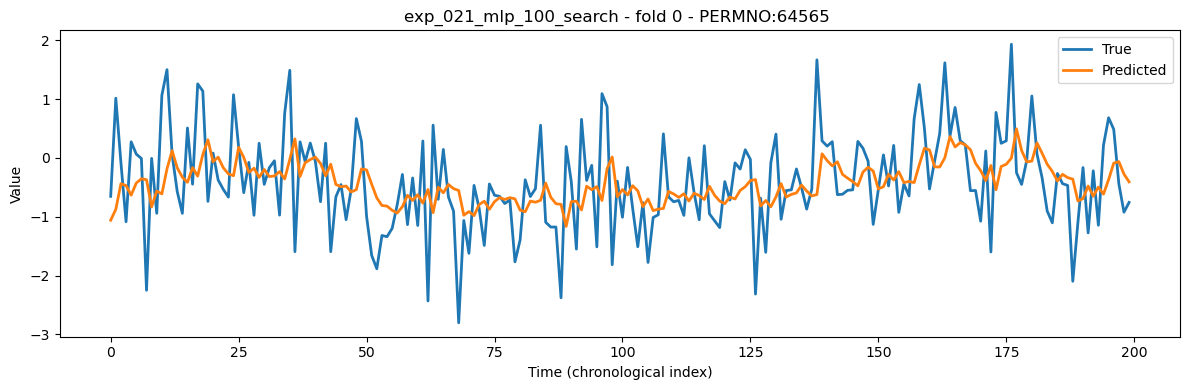

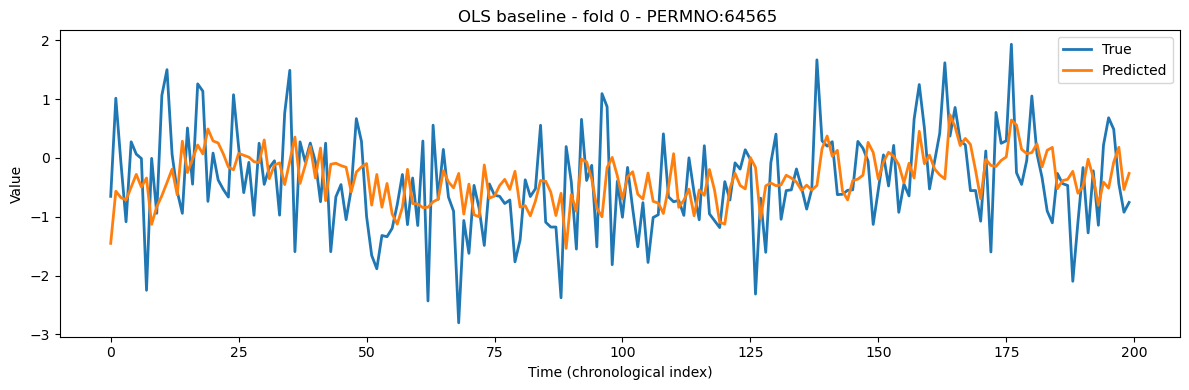

In [191]:
# Add after loading `checkpoint` and building/instantiating cfg
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import torch
import numpy as np
from models import create_model

def _prepare_X_for_ols(X: np.ndarray) -> np.ndarray:
    X = np.asarray(X)
    if X.ndim == 1:
        return X.reshape(-1, 1)
    if X.ndim == 2:
        return X
    if X.ndim == 3:
        N, T, D = X.shape
        return X.reshape(N, T * D)
    raise ValueError(f"Unexpected X shape for OLS: {X.shape}")

# Replace the existing _infer_input_shape with this version
def _infer_input_shape(cfg, X_sample, state_dict):
    """
    Infer model input_shape from a sample.
    Accepts:
      (T,)          -> univariate row
      (T,D)         -> multivariate row
      (N,T)         -> whole univariate batch
      (N,T,D)       -> whole multivariate batch
    Returns shapes expected by create_model for each architecture.
    """
    name = cfg.model.name.lower()
    shape = X_sample.shape
    # Remove leading batch dimension if accidentally passed
    if X_sample.ndim == 2 and name == "lstm" and shape[0] != cfg.walkforward.lags and shape[1] == cfg.walkforward.lags:
        # Probably (N,T); leave as handled below
        pass

    if name == "lstm":
        # LSTM expects (T,D)
        if X_sample.ndim == 1:              # (T,)
            return (shape[0], 1)
        elif X_sample.ndim == 2:
            if shape[0] == cfg.walkforward.lags and shape[1] != 1:
                # row already (T,D)
                return (shape[0], shape[1])
            elif shape[1] == cfg.walkforward.lags:
                # batch (N,T) -> treat as univariate features
                return (shape[1], 1)
            else:
                # row (T,1) or (T,D)
                return (shape[0], shape[1])
        elif X_sample.ndim == 3:            # (N,T,D)
            return (shape[1], shape[2])
        else:
            raise ValueError(f"Unexpected LSTM sample shape: {shape}")

    elif name == "simplecnn":
        # CNN expects (C,L) with C=1
        if X_sample.ndim == 1:              # (T,)
            return (1, shape[0])
        elif X_sample.ndim == 2:
            if shape[1] == cfg.walkforward.lags and shape[0] != 1:
                # (N,T) batch -> length = T
                return (1, shape[1])
            elif shape[0] == 1:             # (1,T)
                return (1, shape[1])
            else:                           # (T,D) flattened later
                return (1, shape[0]*shape[1])
        elif X_sample.ndim == 3:            # (N,T,D)
            return (1, shape[1])            # treat D collapsed upstream
        else:
            raise ValueError(f"Unexpected CNN sample shape: {shape}")

    elif name == "mlp":
        # MLP expects flattened window (T,) (or T*D)
        if X_sample.ndim == 1:              # (T,)
            return (shape[0],)
        elif X_sample.ndim == 2:
            if shape[1] == cfg.walkforward.lags and shape[0] != cfg.walkforward.lags:
                # (N,T) batch
                return (shape[1],)
            else:                           # (T,D)
                return (shape[0]*shape[1],)
        elif X_sample.ndim == 3:            # (N,T,D)
            return (shape[1]*shape[2],)
        else:
            raise ValueError(f"Unexpected MLP sample shape: {shape}")

    else:
        raise ValueError(f"Unknown model {cfg.model.name}")

@torch.inference_mode()
def _prepare_batch(cfg, x_row):
    name = cfg.model.name.lower()
    # x_row is a single sample slice from X_test
    if name == "mlp":
        if x_row.ndim == 1:
            xb = torch.as_tensor(x_row, dtype=torch.float32).unsqueeze(0)
        elif x_row.ndim == 2:
            xb = torch.as_tensor(x_row.reshape(-1), dtype=torch.float32).unsqueeze(0)
        else:
            raise ValueError
    elif name == "simplecnn":
        # expect (N, C, L); x_row maybe (T,) or (T,D)
        if x_row.ndim == 1:
            xb = torch.as_tensor(x_row, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
        elif x_row.ndim == 2:
            # collapse feature dim
            x_flat = x_row.reshape(-1)
            xb = torch.as_tensor(x_flat, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
        else:
            raise ValueError
    elif name == "lstm":
        # expect (N, T, D)
        if x_row.ndim == 1:
            xb = torch.as_tensor(x_row, dtype=torch.float32).unsqueeze(0).unsqueeze(-1)
        elif x_row.ndim == 2:
            xb = torch.as_tensor(x_row, dtype=torch.float32).unsqueeze(0)
        else:
            raise ValueError
    else:
        raise ValueError
    return xb

def build_model_from_checkpoint(cfg, checkpoint, X_example):
    state_dict = {k.replace("_orig_mod.", ""): v for k, v in checkpoint["model_state"].items()}
    input_shape = _infer_input_shape(cfg, X_example, state_dict)
    output_shape = cfg.walkforward.lookback + 1 if cfg.walkforward.lookback is not None else 1
    model = create_model(cfg.model, input_shape, output_shape)
    model.load_state_dict(state_dict, strict=True)
    model.to("cuda").eval()
    return model

@torch.inference_mode()
def infer_sequential(model, cfg, X_test, y_test, limit=None, device="cuda"):
    """
    Sequential single-row inference over chronologically sorted X_test.
    Returns predicted array aligned with y_test.
    """
    preds = []
    limit = len(X_test) if limit is None else limit
    for i in range(limit):
        xb = _prepare_batch(cfg, X_test[i]).to(device)
        pb = model(xb).detach().cpu().numpy().reshape(-1)
        preds.append(pb)
    preds = np.vstack(preds)  # (N, output_dim)
    y_true = np.asarray(y_test[:limit])
    if y_true.ndim == 1:
        y_true = y_true.reshape(-1, 1)
    return y_true, preds

def plot_forecast_overlay(y_true, y_pred, title="Forecast overlay"):
    """
    Overlay predicted vs true for single-output or first dimension of multi-output.
    """
    if y_true.shape[1] > 1:
        yt = y_true[:, 0]
        yp = y_pred[:, 0]
        dim_note = "(Dim 0)"
    else:
        yt = y_true.ravel()
        yp = y_pred.ravel()
        dim_note = ""
    plt.figure(figsize=(12,4))
    plt.plot(yt, label="True", lw=2)
    plt.plot(yp, label="Predicted", lw=2)
    plt.title(f"{title} {dim_note}")
    plt.xlabel("Time (chronological index)")
    plt.ylabel("Value")
    plt.legend()
    plt.tight_layout()
    plt.show()

# ---- Usage example ----
# Assuming data[fold_num] loaded earlier:
Xtr, ytr, Xv, yv, Xte, yte, Xtr_val, ytr_val, Xte_merged, yte_merged = data[fold_num]
X_test_use = Xte[:300]  # or Xte_merged if merge mode
y_test_use = yte
print(X_test_use.shape)


# Fit on merged train+val
Xtr_lin = _prepare_X_for_ols(Xtr_val)
ytr_lin = np.asarray(ytr_val)
ols = LinearRegression(fit_intercept=True).fit(Xtr_lin, ytr_lin)

# Predict on the same test subset used above
Xte_lin = _prepare_X_for_ols(X_test_use)
yhat_te_ols = ols.predict(Xte_lin)

# Align shapes for plotting
y_true_ols = np.asarray(y_test_use[:len(X_test_use)])
if y_true_ols.ndim == 1:
    y_true_ols = y_true_ols.reshape(-1, 1)
if yhat_te_ols.ndim == 1:
    yhat_te_ols = yhat_te_ols.reshape(-1, 1)

mse_ols = mean_squared_error(y_true_ols[:, 0], yhat_te_ols[:, 0])
print(f"Test OLS MSE: {mse_ols:.6f}")


# Forecast model
model = build_model_from_checkpoint(cfg, checkpoint, X_test_use[0])
y_true_seq, y_pred_seq = infer_sequential(model, cfg, X_test_use, y_test_use)
mse_model = mean_squared_error(y_true_seq[:, 0], y_pred_seq[:, 0])
print(f"Test Model MSE: {mse_model:.6f}")

# Print
plot_forecast_overlay(y_true_seq, y_pred_seq, title=f"{name} - fold {fold_num} - PERMNO:{permno}")
plot_forecast_overlay(y_true_ols, yhat_te_ols, title=f"OLS baseline - fold {fold_num} - PERMNO:{permno}")